In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        #layers:
        
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)         
        self.out = nn.Linear(h2, out_features)
        
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
        

In [4]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv("data\iris.csv")

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


c:\Users\makan\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [12]:
y_train = torch.LongTensor(y_train) #there is no diffrent between int64 and long tensor

In [13]:
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
epochs = 100

losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i %10 ==0:
        print(f'epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch 0 and loss is: 1.1507115364074707
epoch 10 and loss is: 0.9377316832542419
epoch 20 and loss is: 0.7798274159431458
epoch 30 and loss is: 0.6099672317504883
epoch 40 and loss is: 0.4008353650569916
epoch 50 and loss is: 0.25436991453170776
epoch 60 and loss is: 0.15052446722984314
epoch 70 and loss is: 0.10086154192686081
epoch 80 and loss is: 0.08127661049365997
epoch 90 and loss is: 0.07230935245752335


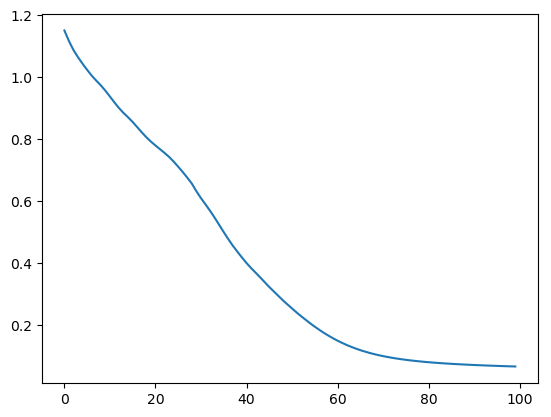

In [17]:
plt.plot(range(epochs), losses)

In [18]:
with torch.no_grad():
    
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.0581)

In [20]:
correct = 0

with torch.no_grad():
    
    for i , data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)}')
        
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(correct)

1.) tensor([-2.1245,  4.8073, -0.8623])
2.) tensor([-1.7976,  5.3110, -1.5445])
3.) tensor([  6.3540,   0.8432, -10.0531])
4.) tensor([-3.9114,  4.5969,  1.1698])
5.) tensor([-7.4707,  3.2028,  5.7865])
6.) tensor([-10.4965,   1.6465,   9.6306])
7.) tensor([  6.3199,   0.9912, -10.1520])
8.) tensor([  7.0467,   0.7053, -10.9127])
9.) tensor([-7.2053,  3.3485,  5.3575])
10.) tensor([-9.3950,  2.5767,  8.1044])
11.) tensor([-9.8795,  2.3483,  8.7148])
12.) tensor([ 6.2747,  0.6650, -9.7604])
13.) tensor([-9.3131,  2.1888,  8.1954])
14.) tensor([-3.7796,  4.5061,  1.0759])
15.) tensor([-7.8646,  3.0127,  6.2310])
16.) tensor([-1.8859,  5.1583, -1.3341])
17.) tensor([-5.6999,  3.5039,  3.6704])
18.) tensor([  7.1788,   0.7363, -11.1340])
19.) tensor([-3.2937,  4.7942,  0.3480])
20.) tensor([-7.7657,  3.7639,  5.7106])
21.) tensor([  6.6498,   0.7883, -10.4241])
22.) tensor([  7.4356,   0.8912, -11.6589])
23.) tensor([-9.7573,  2.1751,  8.6661])
24.) tensor([  6.5769,   0.7415, -10.2723])
2

In [21]:
torch.save(model.state_dict(), 'my_iris_model2.pt')

In [22]:
new_model = Model()

new_model .load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [23]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [24]:
testIris = torch.tensor([5.6,3.7,2.2,0.5])

In [25]:
with torch.no_grad():
    print(new_model(testIris))
    

tensor([  8.0709,   2.9160, -12.9737])
